In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
dataset=pd.read_excel("SuperStoreUS.xlsx")

In [4]:
dataset.head(2)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193


In [38]:
dataset.shape

(1952, 25)

In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                1952 non-null   int64         
 1   Order Priority        1952 non-null   object        
 2   Discount              1952 non-null   float64       
 3   Unit Price            1952 non-null   float64       
 4   Shipping Cost         1952 non-null   float64       
 5   Customer ID           1952 non-null   int64         
 6   Customer Name         1952 non-null   object        
 7   Ship Mode             1952 non-null   object        
 8   Customer Segment      1952 non-null   object        
 9   Product Category      1952 non-null   object        
 10  Product Sub-Category  1952 non-null   object        
 11  Product Container     1952 non-null   object        
 12  Product Name          1952 non-null   object        
 13  Product Base Margi

In [6]:
dataset.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     16
Country                  0
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [40]:
dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean(),inplace=True)

In [42]:
dataset.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Country                 0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

In [44]:
dataset['Order year']=dataset['Order Date'].dt.year

In [46]:
dataset['Order year'].value_counts()

2015    1952
Name: Order year, dtype: int64

# Order Priority

In [8]:
dataset['Order Priority'].value_counts()

Low              398
Not Specified    396
High             391
Critical         390
Medium           376
Critical           1
Name: Order Priority, dtype: int64

In [9]:
#dataset['Order Priority'].unique()

In [10]:
#dataset['Order Priority']= dataset['Order Priority'].replace('Critical ','Critical')

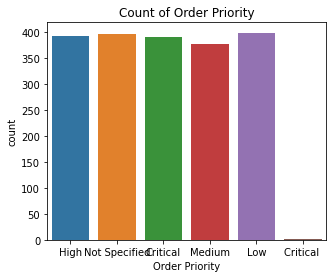

In [24]:
plt.figure(figsize=(5,4))
sns.countplot(x="Order Priority",data=dataset)
plt.title('Count of Order Priority')
plt.savefig('Count of Order Priority.jpg')
plt.show()

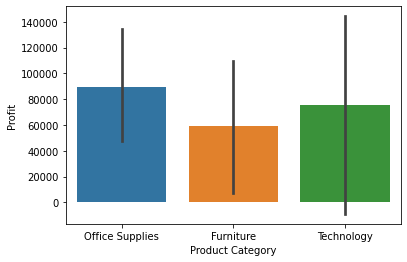

In [53]:
sns.barplot(x='Product Category',y='Profit',data=dataset,estimator='sum')
plt.show()

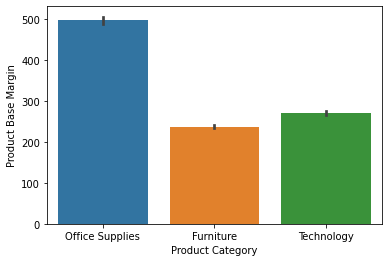

In [54]:
sns.barplot(x='Product Category',y='Product Base Margin',data=dataset,estimator='sum')
plt.show()

# Product Category

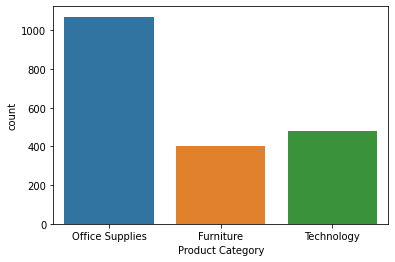

In [26]:
sns.countplot(x="Product Category",data=dataset)
plt.show()

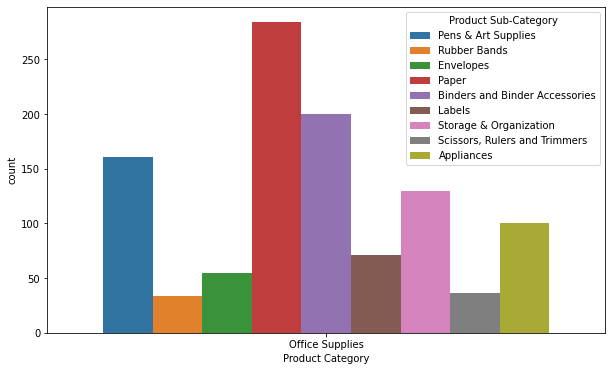

In [34]:
plt.figure(figsize=())
sns.countplot(x="Product Category",data=dataset[dataset['Product Category']=='Office Supplies'],hue="Product Sub-Category")
plt.show()

# Customer Segment

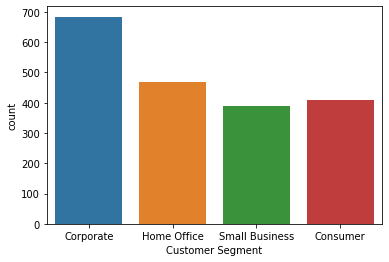

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x="Customer Segment",data=dataset)
plt.show()

# Ship Mode

In [55]:
dataset['Ship Mode'].value_counts()

Regular Air       1437
Delivery Truck     275
Express Air        240
Name: Ship Mode, dtype: int64

In [13]:
x=dataset['Ship Mode'].value_counts().index
y=dataset['Ship Mode'].value_counts().values

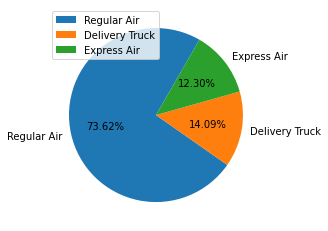

In [14]:
plt.figure(figsize=(5,4))
plt.pie(y,labels=x,startangle=60,autopct="%0.2f%%")
plt.legend(loc=2)
plt.show()

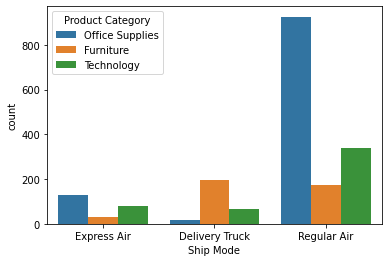

In [16]:
sns.countplot(x="Ship Mode",data=dataset,hue="Product Category")
plt.show()

In [50]:
dataset['State or Province'].value_counts()[:]

California    214
New York      129
Texas         124
Florida       123
Illinois       88
Name: State or Province, dtype: int64